---

## Student Information
### Name:Yawen Cheng
### Student ID:106065508

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

In [3]:
# Define data path_Amazon
amazon_path="sentiment/amazon_cells_labelled.txt"

In [4]:
# Processing data with Pandas
data_amazon = pd.read_csv(amazon_path, sep="\t",header=None, names=["Sentences","Scores"])

In [5]:
# Print data_Amazon
data_amazon

,Sentences,Scores
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [6]:
data_Imdb=open("sentiment/imdb_labelled.txt", "r",encoding = 'utf-8')

In [7]:
lines = data_Imdb.readlines()

In [8]:
len(lines)

1000

In [9]:
data_Imdb = pd.read_csv("sentiment/imdb_labelled.txt", sep="\s\t",header=None, names=["Sentences","Scores"],engine= "python")

In [10]:
data_Imdb

,Sentences,Scores
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [11]:
# Define data path_Yelp
yelp_path="sentiment/yelp_labelled.txt"

In [12]:
# Preprocessing data with Pandas
data_yelp = pd.read_csv(yelp_path, sep="\t",header=None, names=["Sentences","Scores"])

In [13]:
# Print data_Yelp
data_yelp

,Sentences,Scores
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [14]:
# Print top 10 records from data_amazon
data_amazon[0:11]

,Sentences,Scores
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [15]:
# Insert category in data_amazon
data_amazon['category']='Amazon'

In [16]:
# Print top 5 records
data_amazon[0:6]

,Sentences,Scores,category
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
5,I have to jiggle the plug to get it to line up...,0,Amazon


In [17]:
# Insert category into data_imdb
data_Imdb['category']='Imdb'

In [18]:
# Print top 5 records
data_Imdb[0:6]

,Sentences,Scores,category
0,"A very, very, very slow-moving, aimless movie ...",0,Imdb
1,Not sure who was more lost - the flat characte...,0,Imdb
2,Attempting artiness with black & white and cle...,0,Imdb
3,Very little music or anything to speak of.,0,Imdb
4,The best scene in the movie was when Gerardo i...,1,Imdb
5,"The rest of the movie lacks art, charm, meanin...",0,Imdb


In [19]:
# Insert category into data_yelp
data_yelp['category']='Yelp'

In [20]:
# Print top 5 records
data_yelp[0:6]

,Sentences,Scores,category
0,Wow... Loved this place.,1,Yelp
1,Crust is not good.,0,Yelp
2,Not tasty and the texture was just nasty.,0,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp
5,Now I am getting angry and I want my damn pho.,0,Yelp


In [21]:
# Join three data sets in one data frame called x
x=pd.concat([data_amazon,data_Imdb,data_yelp])

In [22]:
# list all records of x
x

,Sentences,Scores,category
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
5,I have to jiggle the plug to get it to line up...,0,Amazon
6,If you have several dozen or several hundred c...,0,Amazon
7,If you are Razr owner...you must have this!,1,Amazon
8,"Needless to say, I wasted my money.",0,Amazon
9,What a waste of money and time!.,0,Amazon


In [23]:
# Inquiry the length of x
len(x)

3000

In [24]:
# Inquiry the 50th records of each category
x.category[50]

50    Amazon
50      Imdb
50      Yelp
Name: category, dtype: object

In [25]:
# List all labels of data_amazon
data_amazon.Scores

0      0
1      1
2      1
3      0
4      1
5      0
6      0
7      1
8      0
9      0
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     1
18     1
19     0
20     0
21     1
22     0
23     1
24     0
25     1
26     1
27     0
28     0
29     0
      ..
970    0
971    1
972    0
973    0
974    0
975    1
976    1
977    1
978    1
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: Scores, Length: 1000, dtype: int64

In [26]:
# Choose 10 records from all records by the intervals of 10 records
x.iloc[::10, :][:10]

,Sentences,Scores,category
0,So there is no way for me to plug it in here i...,0,Amazon
10,And the sound quality is great.,1,Amazon
20,I went on Motorola's website and followed all ...,0,Amazon
30,"This is a simple little phone to use, but the ...",0,Amazon
40,"It has a great camera thats 2MP, and the pics ...",1,Amazon
50,Not loud enough and doesn't turn on like it sh...,0,Amazon
60,Essentially you can forget Microsoft's tech su...,0,Amazon
70,Mic Doesn't work.,0,Amazon
80,I wear it everyday and it holds up very well.,1,Amazon
90,For a product that costs as much as this one d...,0,Amazon


### EXERCISE 0

In [27]:
# Inquiry the label equals "1" within the x data set
x.query('Scores == 1')

,Sentences,Scores,category
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
4,The mic is great.,1,Amazon
7,If you are Razr owner...you must have this!,1,Amazon
10,And the sound quality is great.,1,Amazon
11,He was very impressed when going from the orig...,1,Amazon
13,Very good quality though,1,Amazon
15,Highly recommend for any one who has a blue to...,1,Amazon
17,So Far So Good!.,1,Amazon
18,Works great!.,1,Amazon


In [28]:
# Check the missing values by Bool inquiry
x.isnull().apply(lambda x: dmh.check_missing_values(x)).isnull()

Sentences    False
Scores       False
category     False
dtype: bool

In [29]:
# Check the missing value by objects counts
x.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentences    (The amoung of missing records is: , 0)
Scores       (The amoung of missing records is: , 0)
category     (The amoung of missing records is: , 0)
dtype: object

### Exercise 1

In [30]:
# check missing values by each item
x.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

In [31]:
# Define a dummy record
dummy_series = pd.Series(["1","Amazon"], index=["Scores", "category"])

In [32]:
dummy_series

Scores           1
category    Amazon
dtype: object

In [33]:
# Add the dummy record into data x 
result_with_series = x.append(dummy_series, ignore_index=True)

In [34]:
# Check the length of x and ensure the dummy record was appended successfully
len(result_with_series)

3001

In [35]:
# Check the missing records
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentences    (The amoung of missing records is: , 1)
Scores       (The amoung of missing records is: , 0)
category     (The amoung of missing records is: , 0)
dtype: object

In [36]:
dummy_dict = [{'Scores': '1',
               'category': "yelp"
              }]

In [37]:
x = x.append(dummy_dict,ignore_index=True)

In [38]:
len(x)

3001

In [39]:
x.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentences    (The amoung of missing records is: , 1)
Scores       (The amoung of missing records is: , 0)
category     (The amoung of missing records is: , 0)
dtype: object

In [40]:
# Drop the missing record
x.dropna(inplace=True)

In [41]:
# Inquiry the missing values
x.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentences    (The amoung of missing records is: , 0)
Scores       (The amoung of missing records is: , 0)
category     (The amoung of missing records is: , 0)
dtype: object

In [42]:
# Inquiry the duplicated value by listing all items
x.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [43]:
# Sum the all duplicated records
sum(x.duplicated())

17

In [44]:
# Sum the duplicated category items
sum(x.duplicated('category'))

2997

In [45]:
# Drop all the duplicated records
x.drop_duplicates(keep=False, inplace=True)

In [46]:
len(x)

2966

In [47]:
# Random choose 1000 samples
x_sample = x.sample(n=1000)

In [48]:
# Check the length of the sample
len(x_sample)

1000

In [49]:
# print the top 5 records
x_sample[0:5]

,Sentences,Scores,category
1037,"Buy it, play it, enjoy it, love it.",1,Imdb
66,"A week later after I activated it, it suddenly...",0,Amazon
1595,"Easily, none other cartoon made me laugh in a ...",1,Imdb
2652,It is PERFECT for a sit-down family meal or ge...,1,Yelp
2802,Why are these sad little vegetables so overcoo...,0,Yelp


In [50]:
# Offline to use the plot function 
pyoff.init_notebook_mode(connected=True)

In [51]:
x_category_counts = ta.get_tokens_and_frequency(list(x.category))
x_sample_category_counts = ta.get_tokens_and_frequency(list(x_sample.category))

In [52]:
# Draw a graph to show the category frequency for all 
pyoff.iplot(ta.plot_word_frequency(x_category_counts, "category distribution"))

In [53]:
# Draw a graph to show the category frequency for sampling
pyoff.iplot(ta.plot_word_frequency(x_sample_category_counts, "Category distribution"))

### Exercise 2

In [54]:
# Inquiry the records of each category
x_category_counts

(odict_keys(['Imdb', 'Yelp', 'Amazon']), odict_values([994, 992, 980]))

In [55]:
# Define the grouping bar
trace1 = go.Bar(
    x=list(x_category_counts[0]),
    y=list(x_category_counts[1]),
    name='grouping')

In [56]:
# Define the sampling bar
trace2 = go.Bar(
    x=list(x_sample_category_counts[0]),
    y=list(x_sample_category_counts[1]),
    name='Sampling')

In [57]:
# Draw a graph to compare the Frequencies of grouping and sampling 
data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
pyoff.iplot(fig, filename='grouped-bar')

### Feature Creation

In [58]:
# Define the Sentences as the unigrams source
x['unigrams'] = x['Sentences'].apply(lambda x: dmh.tokenize_text(x))

In [59]:
# Print the top 4 unigrams
x[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [60]:
# Print the first unigrams as a list
list(x[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

###  Feature subset selection

In [61]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(x.Sentences)

In [62]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(x[4:5].Sentences)))

['the', 'mic', 'is', 'great']

In [63]:
" ".join(list(x[4:5].Sentences))

'The mic is great.'

In [64]:
X_counts.shape

(2966, 5153)

In [65]:
count_vect.get_feature_names()[1000:1020]

['contrast',
 'contributing',
 'contributory',
 'contrived',
 'control',
 'controls',
 'controversy',
 'contstruct',
 'convenient',
 'convention',
 'conversation',
 'conversations',
 'converter',
 'convey',
 'convince',
 'convincing',
 'convoluted',
 'cook',
 'cooked',
 'cooking']

In [66]:
x[0:5]

,Sentences,Scores,category,unigrams
0,So there is no way for me to plug it in here i...,0,Amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,Amazon,"[The, mic, is, great, .]"


In [67]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [68]:
count_vect.transform(['in a realistic world']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [71]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [72]:
plot_y = ["Sentences_"+ str(i) for i in list(x.index)[0:20]]

In [73]:
plot_z = X_counts[0:20, 0:20].toarray()

In [74]:
pyoff.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

### Exercise 3

In [75]:
x_sample = x.sample(n=100)

In [76]:
count_vect = CountVectorizer()
X_sample_counts = count_vect.fit_transform(x_sample.Sentences)

In [77]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[:]]

In [78]:
plot_y = ["Sentences_"+ str(i) for i in list(x.index)[:]]

In [79]:
plot_z = X_sample_counts[:, :].toarray()

In [80]:
pyoff.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

## Dimensionality Reduction

In [81]:
from sklearn.decomposition import PCA

In [82]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [83]:
X_reduced.shape

(2966, 3)

In [84]:
trace1 = ta.get_trace(X_reduced, x["category"], "Amazon", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, x["category"], "Imdb", "rgb(52,133,252)")
trace3 = ta.get_trace(X_reduced, x["category"], "Yelp", "rgb(229,65,136)")

In [85]:
data = [trace1, trace2, trace3]

In [86]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
pyoff.iplot(fig, filename='simple-3d-scatter')

## Atrribute Transformation / Aggregation

In [87]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray())[0])

In [88]:
term_frequencies

[1,
 34,
 3,
 2,
 4,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 7,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 5,
 4,
 1,
 85,
 7,
 1,
 1,
 1,
 21,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 3,
 43,
 7,
 1,
 1,
 1,
 1,
 10,
 19,
 3,
 3,
 1,
 16,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 2,
 4,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 52,
 2,
 49,
 2,
 4,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 148,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 14,
 3,
 5,
 1,
 1,
 4,
 74,
 8,
 1,
 24,
 35,
 1,
 1,
 3,
 34,
 1,
 9,
 7,
 3,
 2,
 2,
 2,
 2,
 8,
 1,
 2,
 1,
 106,
 1,
 1138,
 1,
 3,
 1,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 7,
 22,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 53,
 

In [89]:
pyoff.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

### Exercise 4

In [90]:
term_frequencies = []
for j in range(0,X_sample_counts.shape[1]):
    term_frequencies.append(sum(X_sample_counts[:,j].toarray())[0])

In [91]:
pyoff.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

### Exercise 5

In [92]:
term_frequencies

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 6,
 28,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 12,
 1,
 4,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 3,
 5,
 2,
 1,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 1,
 1,
 4,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 6,
 2,
 4,
 1,
 1,
 1,
 1,
 3,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 4,
 13,
 1,
 5,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [93]:
# grouping the term and frequency
zip(term_frequencies,count_vect.get_feature_names())

In [94]:
# Sorted the zip from the Biggest to lowest
sorted(zip(term_frequencies,count_vect.get_feature_names()), reverse= True)

[(75, 'the'),
 (31, 'was'),
 (28, 'and'),
 (27, 'it'),
 (27, 'is'),
 (26, 'to'),
 (26, 'this'),
 (22, 'of'),
 (17, 'in'),
 (13, 'that'),
 (13, 'good'),
 (13, 'for'),
 (12, 'with'),
 (12, 'as'),
 (11, 'very'),
 (9, 'not'),
 (9, 'my'),
 (7, 'time'),
 (7, 'there'),
 (7, 'so'),
 (6, 'some'),
 (6, 'only'),
 (6, 'from'),
 (6, 'film'),
 (6, 'but'),
 (6, 'an'),
 (5, 'you'),
 (5, 'we'),
 (5, 'thing'),
 (5, 'see'),
 (5, 'phone'),
 (5, 'one'),
 (5, 'on'),
 (5, 'no'),
 (5, 'movie'),
 (5, 'his'),
 (5, 'have'),
 (5, 'great'),
 (5, 'because'),
 (5, 'bad'),
 (5, 'also'),
 (4, 'up'),
 (4, 'service'),
 (4, 'really'),
 (4, 'ordered'),
 (4, 'or'),
 (4, 'how'),
 (4, 'going'),
 (4, 'first'),
 (4, 'do'),
 (4, 'by'),
 (4, 'best'),
 (4, 'avoid'),
 (4, 'at'),
 (4, 'all'),
 (3, 'works'),
 (3, 'were'),
 (3, 'well'),
 (3, 'two'),
 (3, 'silent'),
 (3, 'restaurant'),
 (3, 'probably'),
 (3, 'place'),
 (3, 'out'),
 (3, 'never'),
 (3, 'like'),
 (3, 'its'),
 (3, 'has'),
 (3, 'had'),
 (3, 'food'),
 (3, 'fact'),
 (3, 'cam

In [95]:
# Unzip the term and frequencies
Frequency,wordings=zip(*sorted(zip(term_frequencies,count_vect.get_feature_names()), reverse= True))

In [96]:
Frequency

(75,
 31,
 28,
 27,
 27,
 26,
 26,
 22,
 17,
 13,
 13,
 13,
 12,
 12,
 11,
 9,
 9,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 

In [97]:
pyoff.iplot(ta.plot_word_frequency([wordings, Frequency], "Term Frequency Distribution"))

In [98]:
# Draw a graph by using log to make the graph be more visualised.
term_frequencies_log = [math.log(i) for i in Frequency]

In [99]:
pyoff.iplot(ta.plot_word_frequency([wordings, term_frequencies_log], "Term Frequency Distribution"))

## Discretization and Binarization

In [100]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [101]:
mlb = preprocessing.LabelBinarizer()

In [102]:
mlb.fit(x.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [103]:
mlb.classes_

array(['Amazon', 'Imdb', 'Yelp'],
      dtype='<U6')

In [104]:
mlb.classes_

array(['Amazon', 'Imdb', 'Yelp'],
      dtype='<U6')

In [105]:
x['bin_category'] = mlb.transform(x['category']).tolist()

In [106]:
x[0:11]

,Sentences,Scores,category,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,Amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,Amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,Amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,Amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,Amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,Amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,Amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,Amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,Amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
9,What a waste of money and time!.,0,Amazon,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]"


## Extra Practice

In [107]:
text = open(
"sentiment/amazon_cells_labelled.txt").read()

In [108]:
word_cloud = WordCloud().generate(text)

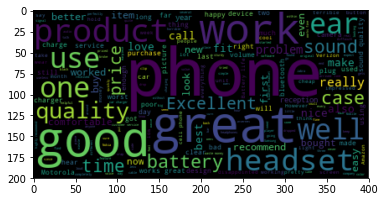

In [109]:
plt.imshow(word_cloud, interpolation='bilinear')

End